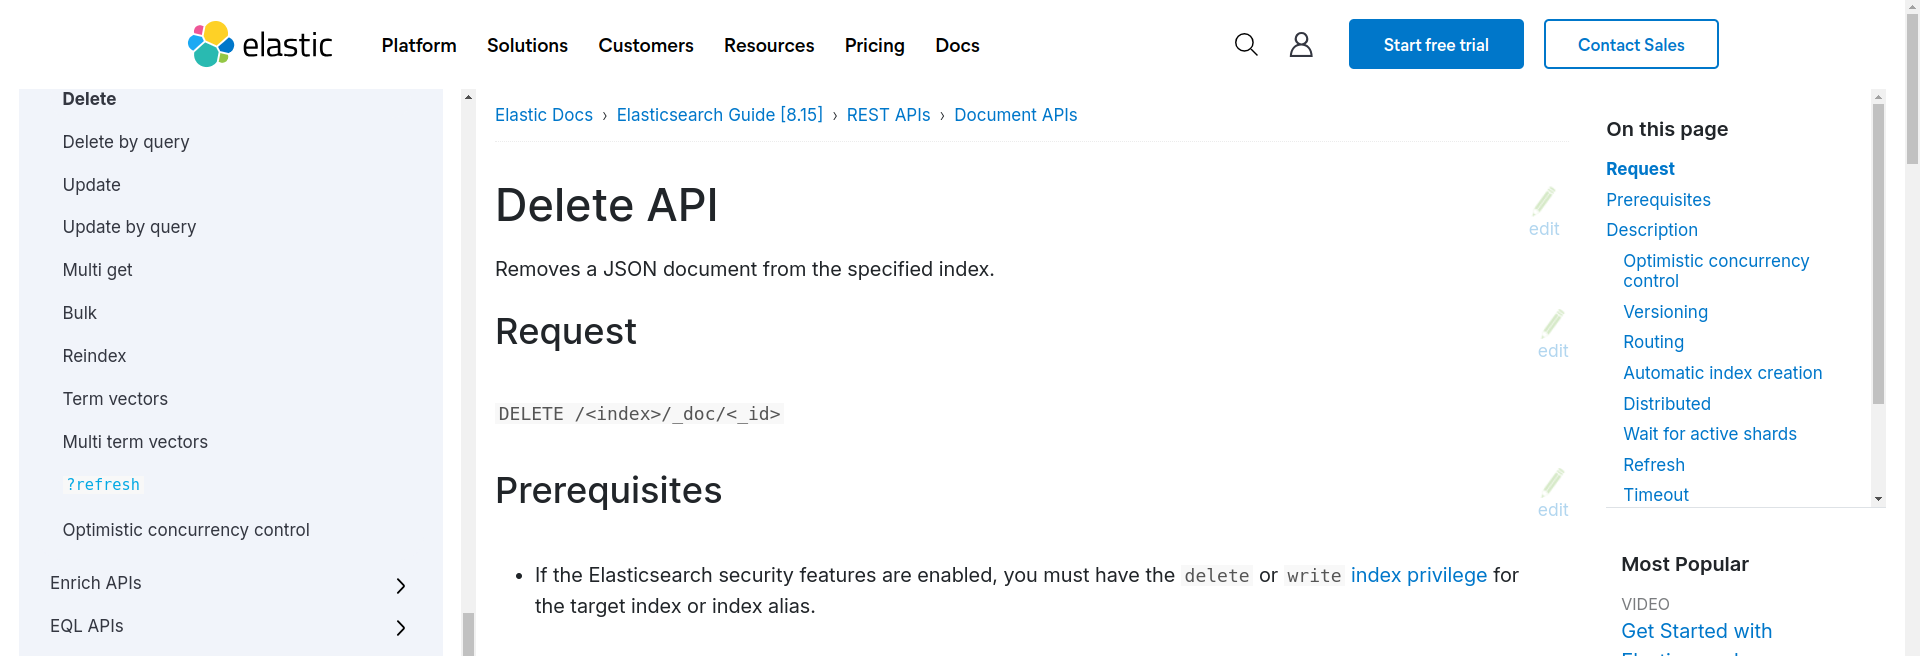

In [9]:
from IPython.display import Image, display

display(Image(filename="../images/delete_documents_docs.png"))

## Connect To Elastic Search

In [1]:
from pprint import pprint
from elasticsearch import Elasticsearch

es = Elasticsearch('http://localhost:9200')
client_info = es.info()
print('Connected to Elasticsearch!')
pprint(client_info.body)

Connected to Elasticsearch!
{'cluster_name': 'docker-cluster',
 'cluster_uuid': 'FQt-ffZfTpeh0Snf3pUAQw',
 'name': 'ae8b5b4be42b',
 'tagline': 'You Know, for Search',
 'version': {'build_date': '2024-08-05T10:05:34.233336849Z',
             'build_flavor': 'default',
             'build_hash': '1a77947f34deddb41af25e6f0ddb8e830159c179',
             'build_snapshot': False,
             'build_type': 'docker',
             'lucene_version': '9.11.1',
             'minimum_index_compatibility_version': '7.0.0',
             'minimum_wire_compatibility_version': '7.17.0',
             'number': '8.15.0'}}


### Index Documents

In [2]:
es.indices.delete(index='my_index', ignore_unavailable=True)
es.indices.create(index='my_index')

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

We are using the `dummy_data.json` file to insert multiple documents in the index. We store the id of each document in the `document_ids`list.

In [4]:
import json
from tqdm import tqdm

document_ids = []
dummy_data = json.load(open("../data/dummy_data.json"))
for document in tqdm(dummy_data, total=len(dummy_data)):
    response = es.index(index='my_index', body=document)
    document_ids.append(response['_id'])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 30.70it/s]


In [5]:
document_ids

['ZCo4KpoBqbZEoMTBbMq5', 'ZSo4KpoBqbZEoMTBbcoG', 'Zio4KpoBqbZEoMTBbcoL']

### Delete operation

This is an example of a successful operation. If the `ID` exists in the document, the `delete` operation won't return any errors.

In [6]:
response = es.delete(index='my_index', id=document_ids[0])

In [7]:
from pprint import pprint

pprint(response.body)

{'_id': 'ZCo4KpoBqbZEoMTBbMq5',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 3,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 2,
 'result': 'deleted'}


This example shows that the `delete` operation fails when providing it with an `ID` that does not exist in the index.



In [8]:
try:
    response = es.delete(index='my_index', id="id")
except Exception as e:
    print(e)

NotFoundError(404, "{'_index': 'my_index', '_id': 'id', '_version': 1, 'result': 'not_found', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 4, '_primary_term': 1}")
